In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from skimage import transform
import cv2
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d muhammadkhalid/sign-language-for-numbers

100% 48.0M/48.1M [00:00<00:00, 47.0MB/s]
100% 48.1M/48.1M [00:00<00:00, 81.9MB/s]


In [ ]:
!mkdir train
!unzip /content/sign-language-for-numbers.zip

Streaming output truncated to the last 5000 lines.
  inflating: Sign Language for Numbers/7/seven_549.jpg  
  inflating: Sign Language for Numbers/7/seven_55.jpg  
  inflating: Sign Language for Numbers/7/seven_550.jpg  
  inflating: Sign Language for Numbers/7/seven_551.jpg  
  inflating: Sign Language for Numbers/7/seven_552.jpg  
  inflating: Sign Language for Numbers/7/seven_553.jpg  
  inflating: Sign Language for Numbers/7/seven_554.jpg  
  inflating: Sign Language for Numbers/7/seven_555.jpg  
  inflating: Sign Language for Numbers/7/seven_556.jpg  
  inflating: Sign Language for Numbers/7/seven_557.jpg  
  inflating: Sign Language for Numbers/7/seven_558.jpg  
  inflating: Sign Language for Numbers/7/seven_559.jpg  
  inflating: Sign Language for Numbers/7/seven_56.jpg  
  inflating: Sign Language for Numbers/7/seven_560.jpg  
  inflating: Sign Language for Numbers/7/seven_561.jpg  
  inflating: Sign Language for Numbers/7/seven_562.jpg  
  inflating: Sign Language for Numbers/

In [ ]:
images_path = 'Sign Language for Numbers'
classes = "0 1 2 unknown".split()
len(classes)

4

(100, 72)


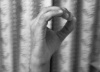

In [ ]:
image = Image.open(images_path + '/0/zero_1.jpg')
print(image.size)
image

In [ ]:
img = cv2.imread(images_path + '/0/zero_1.jpg')
img.shape

(72, 100, 3)

In [ ]:
data_generator = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, horizontal_flip=True)

data_batches = data_generator.flow_from_directory(images_path, class_mode='categorical',
                                                 target_size=(100, 72), batch_size=64)

Found 16500 images belonging to 11 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=4, padding='same', kernel_initializer='he_uniform', input_shape=(100,72,3)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=4, padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Dense(11, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 72, 32)       1568      
_________________________________________________________________
batch_normalization_9 (Batch (None, 100, 72, 32)       128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 72, 64)       32832     
_________________________________________________________________
batch_normalization_10 (Batc (None, 100, 72, 64)       256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 36, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 36, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 115200)           

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath='model2_{epoch:02d}.h5', save_freq=10) 

history = model.fit_generator(data_batches, steps_per_epoch=(6000//64), epochs=50, callbacks=[checkpoint])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
93/93 [==============================] - 19s 201ms/step - loss: 2.2990 - accuracy: 0.2063
Epoch 2/50
93/93 [==============================] - 18s 191ms/step - loss: 2.1570 - accuracy: 0.2525
Epoch 3/50
93/93 [==============================] - 18s 197ms/step - loss: 2.0891 - accuracy: 0.2838
Epoch 4/50
93/93 [==============================] - 19s 204ms/step - loss: 2.0175 - accuracy: 0.3065
Epoch 5/50
93/93 [==============================] - 18s 189ms/step - loss: 1.9764 - accuracy: 0.3301
Epoch 6/50
93/93 [==============================] - 17s 188ms/step - loss: 1.8905 - accuracy: 0.3666
Epoch 7/50
93/93 [==============================] - 20s 215ms/step - loss: 1.8233 - accuracy: 0.3949
Epoch 8/50
93/93 [==============================] - 18s 198ms/step - loss: 1.8384 - accuracy: 0.3809
Epoch 9/50
93/93 [==============================] - 18s 196ms/step - loss: 1.8759 - accuracy: 0.3682
Epoch 10/50
93/93 [==============================] - 18s 197ms/step - loss: 1.7797 - accura

In [ ]:
model.save("final_model.h5")
hist = history.history
hist.keys()

dict_keys(['loss', 'accuracy'])

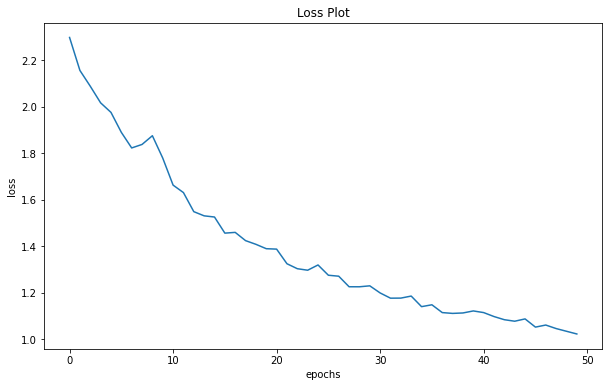

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist['loss'])
plt.title('Loss Plot')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('loss_plot_2.jpg')
plt.show()

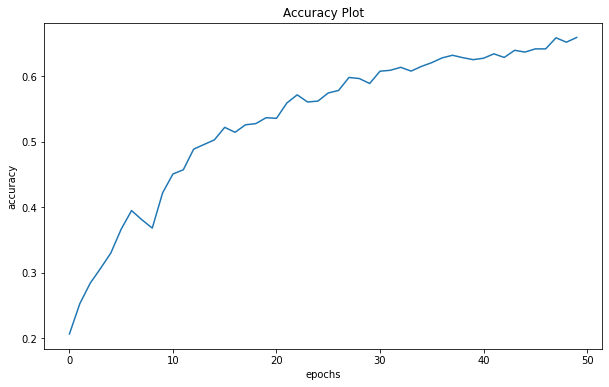

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist['accuracy'])
plt.title('Accuracy Plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.savefig('accuracy_plot.jpg')
plt.show()